Epoch: 0050 cost= 0.527059555 W= 1.80745 b= 1.49235
Epoch: 0100 cost= 0.243022203 W= 1.54828 b= 2.29721
Optimization Finished!
Training cost= 0.243022 W= 1.54828 b= 2.29721 

Epoch: 0050 cost= 0.112055153 W= 1.37231 b= 2.84375
Epoch: 0100 cost= 0.051667683 W= 1.25281 b= 3.21486
Epoch: 0150 cost= 0.023823561 W= 1.17167 b= 3.46686
Epoch: 0200 cost= 0.010984894 W= 1.11657 b= 3.63798
Optimization Finished!
Training cost= 0.0109849 W= 1.11657 b= 3.63798 

Epoch: 0050 cost= 0.005064989 W= 1.07915 b= 3.75417
Epoch: 0100 cost= 0.002335453 W= 1.05375 b= 3.83307
Epoch: 0150 cost= 0.001076852 W= 1.0365 b= 3.88665
Epoch: 0200 cost= 0.000496563 W= 1.02478 b= 3.92303
Epoch: 0250 cost= 0.000228965 W= 1.01683 b= 3.94773
Epoch: 0300 cost= 0.000105575 W= 1.01143 b= 3.96451
Optimization Finished!
Training cost= 0.000105575 W= 1.01143 b= 3.96451 

Epoch: 0050 cost= 0.000048680 W= 1.00776 b= 3.9759
Epoch: 0100 cost= 0.000022445 W= 1.00527 b= 3.98364
Epoch: 0150 cost= 0.000010350 W= 1.00358 b= 3.98889
Epoch

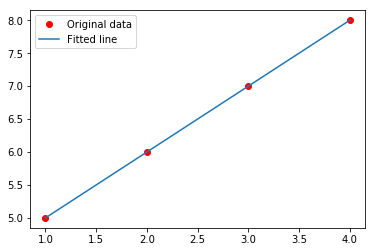

Epoch: 0050 cost= 0.000000197 W= 1.00052 b= 3.99846
Epoch: 0100 cost= 0.000000182 W= 1.0005 b= 3.99852
Optimization Finished!
Training cost= 1.82364e-07 W= 1.0005 b= 3.99852 

Epoch: 0050 cost= 0.000000171 W= 1.00048 b= 3.99857
Epoch: 0100 cost= 0.000000160 W= 1.00047 b= 3.99862
Epoch: 0150 cost= 0.000000148 W= 1.00045 b= 3.99867
Epoch: 0200 cost= 0.000000136 W= 1.00043 b= 3.99872
Optimization Finished!
Training cost= 1.36486e-07 W= 1.00043 b= 3.99872 

Epoch: 0050 cost= 0.000000126 W= 1.00042 b= 3.99877
Epoch: 0100 cost= 0.000000117 W= 1.0004 b= 3.99882
Epoch: 0150 cost= 0.000000108 W= 1.00039 b= 3.99886
Epoch: 0200 cost= 0.000000099 W= 1.00037 b= 3.99891
Epoch: 0250 cost= 0.000000090 W= 1.00035 b= 3.99896
Epoch: 0300 cost= 0.000000083 W= 1.00034 b= 3.999
Optimization Finished!
Training cost= 8.29467e-08 W= 1.00034 b= 3.999 

Epoch: 0050 cost= 0.000000077 W= 1.00032 b= 3.99904
Epoch: 0100 cost= 0.000000071 W= 1.00031 b= 3.99907
Epoch: 0150 cost= 0.000000066 W= 1.0003 b= 3.99911
Epoch:

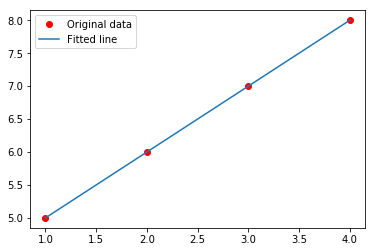

In [34]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

rate_list=[0.05,0.005]
epoch_list=[100,200,300,400]
j=[]
learning_rate = 0.005
#training_epochs = 1000
display_step = 50

train_X = numpy.asarray([1.,2.,3.,4.])
train_Y = numpy.asarray([5.,6.,7.,8.])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for rate in rate_list:
        optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
        for training_epochs in epoch_list:
            #optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
            for epoch in range(training_epochs):
                for (x, y) in zip(train_X, train_Y):
                    sess.run(optimizer, feed_dict={X: x, Y: y})
                if (epoch+1) % display_step == 0:
                    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
            print("Optimization Finished!")
            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
            j.append(training_cost)
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()
    
#print(j)

